# Solving Kaglle Credit Card Fraud

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

RANDOM_SEED = 42

In [2]:
# Reading and preprocessing data
credit_data = pd.read_hdf('./data/creditcard_hard.hdf5')

In [3]:
credit_data.to_hdf('./data/creditcard_hard.hdf5',key='strong',complevel=9)

<AxesSubplot:>

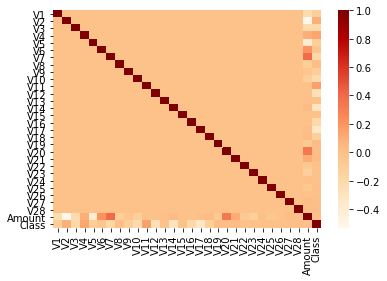

In [4]:
# Correlação entre as variáveis
corr_vars = credit_data.corr()
sns.heatmap(corr_vars,cmap='OrRd',yticklabels=corr_vars.columns,xticklabels=corr_vars.columns)

<AxesSubplot:>

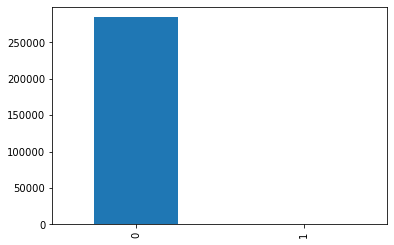

In [5]:
# Trata-se de um dataset desbalanceado
credit_data.Class.value_counts().plot.bar()

In [6]:
# Fracionando o dataset pra testar modelos
credit_data_frac = credit_data.sample(frac=0.1,random_state=RANDOM_SEED)

# Aplicando Modelos de Forma Dummy

In [7]:
fraude = credit_data_frac[credit_data_frac.Class==1]
valido = credit_data_frac[credit_data_frac.Class==0]
outlier_fraction = len(fraude)/float(len(valido))
print(outlier_fraction,fraude.shape[0],valido.shape[0])

0.001617724635132759 46 28435


In [8]:
TEST_SIZE = 0.2
RANDOM_SEED = 42
STRATEGY_NUM = 'mean'
SCORING = 'recall' #'roc_auc' #'accuracy'
N_SPLITS = 5

X = credit_data_frac.drop(columns='Class')
y = credit_data_frac.loc[:,'Class']

# Antes de mais nada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

# Como não há nan, o único preprocessing necessário é standarlizar
NUM_FEAT = X.columns.values
scaler = StandardScaler()
num_transf = Pipeline([('Scaler',scaler)])

preprocessor = ColumnTransformer(transformers=[
    ('Numeric',num_transf,NUM_FEAT)
])

iso_forest = IsolationForest(n_estimators=100,max_samples=len(X),
               contamination=outlier_fraction,random_state=RANDOM_SEED,verbose=0)
loc_out = LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                            leaf_size=30,metric='minkowski',
                            p=2,metric_params=None,contamination=outlier_fraction)
one_svm = OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05)
kfold = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)

# list models
list_models = [('ISF', iso_forest),('LOUT',loc_out),('OSVM',one_svm)]#, ('Log_Reg', log_reg), ('Grad_Boost', grad_boost)]

df_summary = pd.DataFrame(columns=['Mean','Std','Precision Recall AUC'])
df_scores = pd.DataFrame()

# cross-val, treino e avalicao tudo num for
for name, model in list_models:
    pipe = Pipeline([('Preprocessor', preprocessor), (name, model)])
    #scores = cross_val_score(pipe, X_train, y_train, scoring=SCORING, cv=kfold)
    #df_scores.loc[:, name] = scores
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    # Calculating the precision recall curve
    #precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    #auc_score = auc(recall, precision)
    #df_summary.loc[name] = [auc_score*100]
    print('Modelo:',name)
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

#print(df_summary)
#df_scores.boxplot(figsize=(10, 10))
#plt.show()

C:\Users\jonatas.hernandes\.conda\envs\s2\lib\site-packages\sklearn\ensemble\_iforest.py:285: UserWarning: max_samples (28481) is greater than the total number of samples (22784). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "


Modelo: ISF
0.00070212392487274
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      5691
           1       0.00      0.67      0.00         6

    accuracy                           0.00      5697
   macro avg       0.00      0.22      0.00      5697
weighted avg       0.00      0.00      0.00      5697



C:\Users\jonatas.hernandes\.conda\envs\s2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonatas.hernandes\.conda\envs\s2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AttributeError: predict is not available when novelty=False, use fit_predict if you want to predict on training data. Use novelty=True if you want to use LOF for novelty detection and predict on new unseen data.

In [ ]:
y_pred_proba.shape

In [ ]:
from sklearn import metrics
metrics.SCORERS.keys()

In [ ]:
pipe.steps[1][1].feature_importances_

In [ ]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(n_jobs=-1, random_state=1)
isf.fit(df_overfit[NUM_FEAT], df_overfit['target'])

#print(isf.score_samples(df_overfit[NUM_FEAT]))
isf.predict(df_overfit[NUM_FEAT])